# **AdaBoost**

Las técnicas de *Boosting* son parecidas a las de *Bagging* en cuanto a que ambas son técnicas de ensamblaje de algoritmos. Aquí veremos uno de los modelos más populares dentro de las técnicas de *Boosting*: **AdaBoost** o *Adaptative Boosting*.

# ***Boosting***

La diferencia entre *Bagging* y *Boosting* radica en cómo se configura el ensamblado. Mientras que en *Bagging* simplemente se entrenaban varios algoritmos de forma independiente, en el *Boosting* los estimadores se entrenan con la salida del estimador previo. Esta configuración esta pensada para el entrenamiento secuencial de cada uno de ellos. Es por ello que, mientras que en el *Bagging* se espera que todos los estimadores lo hagan lo mejor posible, alcanzando un cierto nivel de complejidad, en el *Boosting* se espera que la predicción sea cuestión de más y más iteraciones y no sean necesarios estimadores excesivamente complejos. De hecho en la versión más usual de AdaBoost con Árboles de Decisión, estos árboles suelen ser estar limitados a una profundidad de uno, una sola partición. Se conocen como *stumps* y son los eslabones que conforman AdaBoost.

<div style="display: flex; justify-content: center;">
<img src="https://drive.google.com/uc?export=view&id=1xYAhCr4mCc6Y1Fk8LYIew3s6aE9WUNMw" width="600">

# **Entrenamiento de AdaBoost**

De ahora en adelante supondremos que estos estimadores son Árboles de Decisión porque es la forma más usual de verlo en AadaBoost, aunque realmente pueden ser cualquier otro algoritmo. AdaBoost se entrena iterativamente, añadiendo en cada iteración un estimador o *stump*. También hace uso de unos pesos que asigna a cada fila o instancia de los datos y que van modificándose en cada iteración. Así, cada nueva iteración añade un nuevo estimador que trabaja con los datos ponderados por la salida del estimador en la iteración previa.

El entrenamiento de AdaBoost comienza asignando esos pesos $w$ a las filas, inicialmente el mismo peso para todas: $\frac{1}{n}$, siendo $n$ el número total de muestras de entrenamiento. Estos datos se pasan al primer árbol $t$, el cual realizará una clasificación. Dado el límite de tamaño del *stump*, la clasificación no será del todo perfecta. Entonces se calcula un nuevo parámetro llamado $\alpha$, cuya fórmula general es:

$$\alpha_{t} = \frac{1}{2}ln(\frac{1 - \epsilon_{t}}{\epsilon_{t}})$$

$\epsilon$ es una medida del error, y equivale al sumatorio de los pesos de todas las instancias mal clasificadas. Pongamos que tenemos un dataset de $53$ filas y nuestro primer *stump* clasifica erroneamente $12$. Entonces, dado que inicialmente todas las instancias tienen el mismo peso $\epsilon_{1} = 13\times\frac{1}{53} = 0.24$. $\epsilon$ será un valor entre $0$ y $1$ para cualquier estimador, por lo que $\frac{1 - \epsilon_{1}}{\epsilon_{1}}$ será una cifra positiva si el error es reducido, mientras que será entre $0$ y $1$ si el error es más intenso. Para que ambos rangos sean simétricos se calcula el logaritmo. El $\alpha$ resultante funciona como un valor que indica la importancia de ese estimador específico. Un $\alpha$ más elevado indica una alta confianza en ese clasificador. Siguiendo nuestro ejemplo, el $\alpha_{1}$ resultante es de $0.576$

El segundo paso que debe realizarse en cada iteración es recalcular los pesos de las instancias. La idea es que estos pesos aumenten en aquellos datos no clasificados correctamente. También es necesario mantener la suma total de pesos igual a $1$ por lo que aumentar los pesos mal clasificados implica hundir los pesos de las instancias correctamente clasificadas. Para los pesos mal clasificados el nuevo peso es:

$$w_{t+1} = w_{t}e^{\alpha_{t}}$$

y para aquellas bien clasificadas:

$$w_{t+1} = w_{t}e^{-\alpha_{t}}$$

Estos pesos deben de rescalarse para que de nuevo todos ellos sumen $1$.


<div style="display: flex; justify-content: center;">
<img src="https://drive.google.com/uc?export=view&id=1J4a__Y9k9mWa8qYWuHdkdsAwmTFyAj79" width="1000">

En nuestro ejemplo, una instancia mal clasificada pasaría a tener un nuevo peso $w_{2} = e^{0.576} = 0.0336$, mientras que una correctamente clasificada sería $w_{2} = e^{-0.576} = 0.0106$. Así es como iterativamente se construyen un nuevo conjunto de pesos el cual sirve de entrada para un nuevo *stump*.

Quedaría un último paso: queremos que aquellos pesos con un valor más alto (incorrectamente clasificados) influyan más en el siguiente *stump* de manera que este los tenga más en cuenta y sea capaz de corregir los errores del clasificador previo. Esto puede hacerse de varias maneras. Una de ellas es utilizar los pesos para ponderar la métrica de impureza, pero esto es válido solo con Árboles de Decisión para clasificación. La otra estrategia, más general y flexible, consiste es convertir los pesos en una distribución de probabilidad y generar un nuevo muestreo de datos, del mismo tamaño que el original. Será más probable seleccionar aquellas instancias con una probabilidad (peso) más alto. Dado que está permitido el remplazo, una misma instancia podrá aparecer más de una vez, especialmente si fue previamente mal clasificada. En cada nuevo estimador los pesos se reinician de nuevo a $\frac{1}{n}$, pero se espera una sobrerepresentación de datos incorrectamente clasificados en la iteración anterior.

# **Evaluación final del modelo**

Recapitulando: AdaBoost entrena mini-Árboles de Decisión, uno detrás de otro, integrando un sistema para ponderar más intensamente los errores cometidos por el árbol anterior de manera que el siguiente los tenga más en cuenta. ¿Cómo se componen los resultados de cada árbol en una predicción/clasificación general? AdaBoost recurre a los parámetros $\alpha_{t}$ que recordemos, eran específicos de cada *stump* $t$ y reflejan la confianza en cada uno de ellos. Así, si llamamos $h_{t}$ a la salida de cada uno de los estimadores, el output final de ensamblado sería:

$$H = sign(\sum_{t=1}^{T}\eta \alpha_{t}h_{t})$$

$sign()$ es la función signo que devuelve si $1$ si el argumento es positivo y $-1$ si el argumento es negativo. $\eta$ es el parámetro de aprendizaje o *learning rate* que explicamos más abajo. Continuamos el ejemplo y pongamos que hemos entrenado ya un AdaBoost para clasificaciones, el cual se compone de tres estimadores y un *learning rate* de $\eta = 0.1$. Para una instancia dada, los estimadores nos devuelven $1$, $1$ y $-1$, con un $\alpha$ de $0.42$, $0.37$ y $0.51$ respectivamente. La estimación final para esa instancia sería.

$$H = sign(0.1\times1(0.42) + 0.1\times1(0.37)- 0.1\times1(0.51)) = sign(0.028) = 1$$

El llamado *learning rate* $\eta$ pondera la contribución de cada estimador, siendo el mismo para todos. Se trata de un hiperparámetro que va de la mano con el número de estimadores total de AdaBoost. Y es que un número excesivamente bajo de $\eta$ exige que sean necesarios más estimadores para alcanzar un cierta precisión, con el consecuente riesgo de sobreajuste.


# **Guía de uso de AdaBoost**

Ya hemos indicado que aunque AdaBoost suele reservarse para clasificadores binarios de tipo Árbol de Decisión, es aplicable a diferentes algoritmos y generalizable a tareas de regresión. Esta característica de algo particular de los meta-algoritmos de ensamblaje y dota a AdaBoost una gran flexibilidad. Como estrategia de ensamblaje que es, también destaca por su resistencia al sobreajuste y su gran precisión. Es también muy resistente al ruido en los datos y el desbalanceo de clases, aunque no tanto como un Random Forest. Sin embargo supera a este en interpretabilidad.

Principales metaparámetros de AdaBoost.
- `n_estimators`: número de estimadores de AdaBoost. Cada uno es una iteración más en el modelo, lo que supone un coste computacional mayor, aunque la precisión también mejora hasta un punto crítico.
- `learning_rate`: contribución de cada estimador. Suele verse en conjunto `n_estimators` puesto que es necesario un balanceo entre ambos.

Hay que tener en cuenta que no incluímos los metaparámetros del estimador elegido. Si nuestro AdaBoost utiliza árboles, como es usual, habría también que en cuenta los hiperparámetros de esos árboles, como su profundidad.

# **Análisis de DataFrame**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from typing import List, Tuple, Dict
import seaborn as sns

url='https://drive.google.com/file/d/1Ur2NexOaXCXfgjAvuqKKOdSouysjNpn7/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
data = pd.read_csv(dwn_url)

data.head(6)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
5,Fiesta,2015,10500,Manual,35432,Petrol,145,47.9,1.6


In [ ]:
data.shape

(17965, 9)

In [ ]:
list_columns = data.columns.tolist()

num_columns = data.select_dtypes(include=["int64","float64"]).columns.tolist()
print("Columnas numéricas: ", num_columns)

cat_columns = data.select_dtypes(include=["object"]).columns.tolist()
print("Columnas categóricas: ", cat_columns)

Columnas numéricas:  ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']
Columnas categóricas:  ['model', 'transmission', 'fuelType']


In [ ]:
target_column = "price"

pred_columns = [col for col in list_columns if col != target_column]
num_pred_columns = [col for col in pred_columns if col in num_columns]
cat_pred_columns = [col for col in pred_columns if col in cat_columns]
print("Columnas predictoras: ", pred_columns)
print("Columnas numéricas predictoras: ", num_pred_columns)
print("Columnas categóricas predictoras: ", cat_pred_columns)

Columnas predictoras:  ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
Columnas numéricas predictoras:  ['year', 'mileage', 'tax', 'mpg', 'engineSize']
Columnas categóricas predictoras:  ['model', 'transmission', 'fuelType']


In [ ]:
data[target_column] = data[target_column].astype(float)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,17965.0,2016.866574,2.050346,1996.0,2016.0,2017.0,2018.0,2060.0
price,17965.0,12279.756415,4741.382606,495.0,8999.0,11291.0,15299.0,54995.0
mileage,17965.0,23363.630504,19472.114690,1.0,9987.0,18243.0,31064.0,177644.0
tax,17965.0,113.334539,62.010438,0.0,30.0,145.0,145.0,580.0
mpg,17965.0,57.906991,10.125977,20.8,52.3,58.9,65.7,201.8
engineSize,17965.0,1.350827,0.432371,0.0,1.0,1.2,1.5,5.0


In [ ]:
data.describe(include="object").T

,count,unique,top,freq
model,17965,23,Fiesta,6557
transmission,17965,3,Manual,15517
fuelType,17965,5,Petrol,12178


In [ ]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

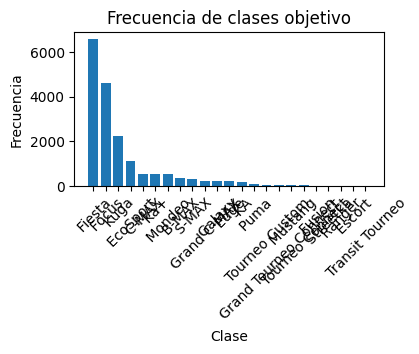

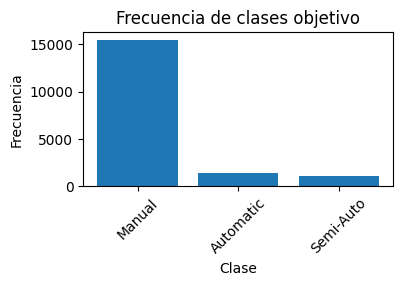

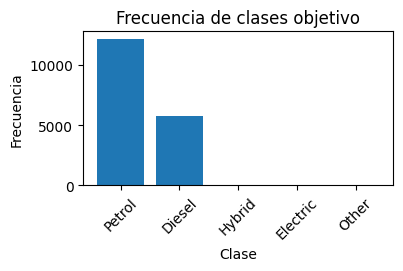

In [ ]:
for cat_column in cat_pred_columns:
  class_counts = data[cat_column].value_counts()
  plt.figure(figsize=(4, 2))
  plt.bar(class_counts.index, class_counts.values)
  plt.xlabel('Clase')
  plt.ylabel('Frecuencia')
  plt.title('Frecuencia de clases objetivo')
  plt.xticks(class_counts.index, [f'{i}' for i in class_counts.index], rotation=45)
  plt.show()

In [ ]:
def filter_by_class_percentage(df, column_name, percentage):
    # Calcular los porcentajes de cada clase en la columna indicada
    class_counts = df[column_name].value_counts(normalize=True)
    # Obtener las clases que cumplen con el porcentaje mínimo requerido
    valid_classes = class_counts[class_counts >= (percentage / 100)].index
    filtered_dataframe = df[df[column_name].isin(valid_classes)]

    return filtered_dataframe

In [ ]:
data = filter_by_class_percentage(data, "model", 5)
data = filter_by_class_percentage(data, "transmission", 5)
data = filter_by_class_percentage(data, "fuelType", 5)

data.reset_index(drop=True, inplace=True) # Suele ser conveniente resetear los índices tras realizar filtrado de datos.

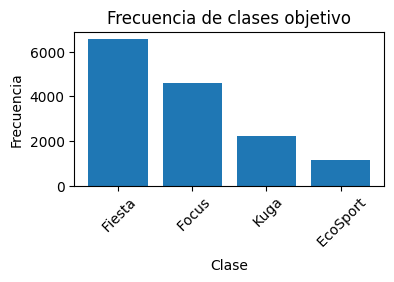

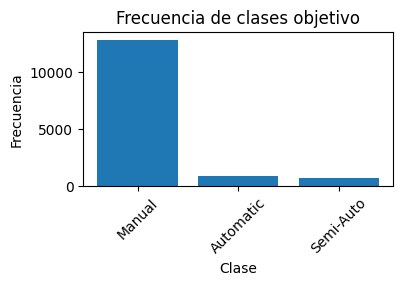

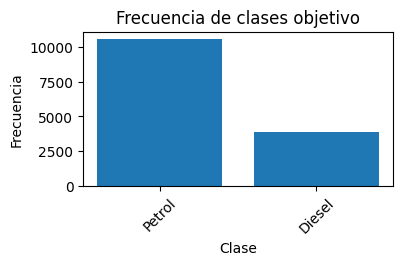

In [ ]:
for cat_column in cat_pred_columns:
  class_counts = data[cat_column].value_counts()
  plt.figure(figsize=(4, 2))
  plt.bar(class_counts.index, class_counts.values)
  plt.xlabel('Clase')
  plt.ylabel('Frecuencia')
  plt.title('Frecuencia de clases objetivo')
  plt.xticks(class_counts.index, [f'{i}' for i in class_counts.index], rotation=45)
  plt.show()

# **Regresión con AdaBoost**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer

# CONSTRUCCIÓN DEL PIPELINE
# Transformador para columnas numéricas.
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
])

# Transformador para columnas categóricas.
# Es importante indicarle como tratar nuevos datos una vez realizada la codificación. Esto es útil cuando existe la posibilidad
# de que los datos nuevos contengan categorías que no se vieron durante el entrenamiento.
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Integramos ambos en un preprocesador con ColumnTransformer, indicando el transformador y la lista de columnas a aplicar.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_pred_columns),
        ('cat', categorical_transformer, cat_pred_columns)
    ]
)

# Creamos el pipeline completo incluyendo ahora sí el estimador.
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', AdaBoostRegressor(
        estimator = DecisionTreeRegressor()
        )
    )
])

In [ ]:
# DIVISIÓN ENTRE COLUMNAS PREDICTIVAS Y OBJETIVO
# Separar columnas predictoras de columna objetivo
X = data.drop(columns=target_column)
y = data[target_column]

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

# DIVISIÓN ENTRE DATOS DE ENTRENAMIENTO Y DATOS DE TESTEO
# Seleccionamos una proporción de 80% de los datos para entrenamiento y 20% para el testeo.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Tamaño datos de entrenamiento:", X_train.shape)
print("Tamaño datos de testeo:", X_test.shape)

Tamaño datos de entrenamiento: (11606, 8)
Tamaño datos de testeo: (2902, 8)


In [ ]:
# CONFIGURACIÓN DE LA BÚSQUEDA DE HIPERPARÁMETROS
# Configurar la búsqueda por validación cruzada para encontrar los mejores valores de hiperparámetros.
metaparameter_list = ['regressor__n_estimators', 'regressor__learning_rate']
param_grid = {
    metaparameter_list[0]: [50, 70, 90, 120, 180, 200],
    metaparameter_list[1]: [0.001, 0.01, 0.1, 1, 10],
}

# Configurar el GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, verbose = 1, scoring='neg_mean_squared_error', error_score='raise')

In [ ]:
from scipy.stats import mode

# BÚSQUEDA DE HIPERPARÁMETROS CON VALIDACIÓN ANIDADA.
# Este paso es independiente del entrenamiento posterior, pero es recomendable para evaluar la variabilidad de los modelos en cuanto a evaluación y selección de hiperparámetros.
n_splits = 5
outer_cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
best_params_list = []
best_scores = []

# Aquí estamos haciendo una Validación Cruzada manualmente. En cada iteración (tantas como número de folds indicados) se calculará un GridSearchCV
# con el conjunto de entrenamiento seleccionado en ese fold.
for train_index, test_index in outer_cv.split(X_train):
    X_train_fold = X_train.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_train_fold = y_train.iloc[train_index]
    y_test_fold = y_train.iloc[test_index]

    # Ejecutar GridSearchCV
    grid_search.fit(X_train_fold, y_train_fold)

    # Almacenar los mejores parámetros y los mejores resultados en cada split
    best_params_list.append(grid_search.best_params_)
    best_scores.append(grid_search.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [ ]:
# EVALUACIÓN DE LOS HIPERPARÁMETROS DE LA VALIDACIÓN ANIDADA.
# Un bucle por fold, indicando el hiperparámetro óptimo y la mejor métrica de error de esa iteración.
for split in range(n_splits):
  for metaparameter in metaparameter_list:
    value = best_params_list[split][metaparameter]
    if isinstance(value, (int, float)):
        print(f'Mejor valor en el fold {split} del {metaparameter} en VC anidada: {round(value, 3)}')
    else:
        print(f'Mejor valor en el fold {split} del {metaparameter} en VC anidada: {value}')
  print(f"Mejor RMSE en el fold {split}: {np.round(np.sqrt(-1*best_scores[split]),2)}\n")

# Un bucle para los estadísticos de cada hiperparámetro
for metaparameter in metaparameter_list:
  values = [value[metaparameter] for value in best_params_list] # Recogemos los diferentes valores que nos devuelve cada fold
  if isinstance(values[0], (int, float)):
    mean = sum(values) / len(values) # Calculamos la media
    std = np.sqrt(sum((value - mean) ** 2 for value in values) / len(values)) # Calculamos la Desviación Típica
    print(f'Promedio de las puntuaciones {metaparameter} en VC anidada: {round(mean,3)}')
    print(f'Desviación Típica de las puntuaciones {metaparameter} en VC anidada: {round(std,3)}\n')
  else:
    unique_values, counts = np.unique(values, return_counts=True) # Valores y su frecuencia en values
    max_index = np.argmax(counts) # Índice del valor con mayor frecuencia
    mode = unique_values[max_index]
    count = counts[max_index]
    print(f'Moda de las puntuaciones {metaparameter} en VC anidada: {mode}')
    print(f'Frecuencia de la moda de las puntuaciones {metaparameter} en VC anidada: {count}')

In [ ]:
# BÚSQUEDA DE HIPERPARÁMETROS SIN VALIDACIÓN ANIDADA
# Entrenamos ahora con GridSearchCV sin anidar.
grid_search.fit(X_train, y_train)

# Mostrar mejor puntuación y los mejores parámetros. Podemos compararlos a aquellos valores obtenidos en la validación cruzada anidada.
for metaparameter in metaparameter_list:
  value = grid_search.best_params_[metaparameter]
  if isinstance(value, (int, float)):
    print(f'Mejor puntuación de {metaparameter} en VC: {round(grid_search.best_params_[metaparameter],3)}')
  else:
    print(f'Mejor valor de {metaparameter} en VC: {value}')
print("Mejor RMSE:", np.round(np.sqrt(grid_search.best_score_),2))

In [ ]:
# TESTEO DEL MODELO
# Recoger el modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# EVALUACIÓN DEL MODELO
# Evaluación del modelo en el conjunto de prueba. Notar como es necesario pasar tanto nuestras predicciones
# y_pred como los valores reales de la variable objetivo y_test.
mae = round(mean_absolute_error(y_test, y_pred),2)
mse = round(mean_squared_error(y_test, y_pred),2)
rmse = round(np.sqrt(mse),2)
r2 = round(r2_score(y_test, y_pred),3)

print(f"Mean Absolute Error (MAE) en el conjunto de testeo: {mae}")
print(f"Mean Squared Error (MSE) en el conjunto de testeo: {mse}")
print(f"Root Mean Squared Error (RMSE) en el conjunto de testeo: {rmse}")
print(f"R-squared (R2) en el conjunto de testeo: {r2}")

In [ ]:
# LOCALIZACIÓN DEL PUNTO CRÍTICO
n_estimators_range = range(1, 181) # Rango en el número de estimadores a probar
train_errors = []
test_errors = []

# Extraer los mejores hiperparámetros
best_learning_rate = grid_search.best_params_['regressor__learning_rate'] # Metaparámetros obtenido del mejor modelo obtenido en el GridSearch

# Este bucle entrena y evalua un Random Forest, cada uno con un número distinto de estimadores.
for n in n_estimators_range:

    adab = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('regressor', AdaBoostRegressor(
          n_estimators = n,
          learning_rate = 0.5,
          estimator = DecisionTreeRegressor()
          )
      )
    ])
    adab.fit(X_train, y_train)

    # Obtenemos la medida del error, tanto para las muestras de entrenamiento como de testeo.
    train_errors.append(np.sqrt(mean_squared_error(y_train, adab.predict(X_train))))
    test_errors.append(np.sqrt(mean_squared_error(y_test, adab.predict(X_test))))

# Graficar los errores de entrenamiento y prueba
plt.figure(figsize=(8, 4))
plt.plot(n_estimators_range, train_errors, label='Error de Entrenamiento')
plt.plot(n_estimators_range, test_errors, label='Error de Testeo')
plt.xlabel('Número de Estimadores')
plt.ylabel('Error')
plt.title('Error vs. Número de Estimadores en AdaBoost')
plt.legend()
plt.show()